<a href="https://colab.research.google.com/github/rsh2458/dragonfly/blob/master/xcorr_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
import pandas as pd

# Plot values
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [53]:
os.listdir('dragonfly/csv')
os.ls()

AttributeError: ignored

# 3D plots
Here are some examples of getting some data into our system, and plotting them in 3d.


In [0]:
def getPE(p, e):
  p=str(p)
  e=str(e)
  data = pd.read_csv('dragonfly/csv/'+pursuer+'-'+evader+'_CSV.txt',sep=';')
  df = pd.DataFrame(data)
  return df


In [0]:
!git clone https://github.com/rsh2458/dragonfly.git

It's hard to create this plots with now real examples, [Scattter3d Examples](https://www.programcreek.com/python/example/103209/plotly.graph_objs.Scatter3d) shows some examples.



In [48]:
p=str(34)
e=str(53)
df=getPE(p,e)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=go.Figure()


fig1=go.Scatter3d(x=df['xt_avg_' + p], 
                    y=df['yt_avg_' + p], 
                    z=df['zt_avg_' + p])

fig.add_trace(fig1)
fig.add_scatter3d(
   x=df['xt_avg_' + e], 
   y=df['yt_avg_' + e], 
   z=df['zt_avg_' + e]) 

#fig.add_scatter3d(df, 
#                  x='xt_' + p, 
#                  y='yt_' + p, 
#                  z='zt_' + p)
#fig1.show()


# GITHUB Library integration

This example shows how you can add external, github libraries into your  notebook.  The idea is that, besides cloning the data, you need to append the new github data into the path where python searches for it's libraries.


In [2]:
!git clone https://github.com/trichter/xcorr.git foobar
sys.path.append('foobar')
sys.path

fatal: destination path 'foobar' already exists and is not an empty directory.


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 'foobar']

Now, you can import functions from the library that you've already defined above.  The example below, imports some functions from the `xcorr.py` file that's found in the `foobar` directory that we've added.

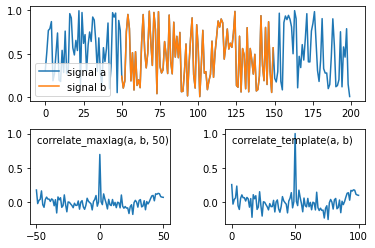

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from xcorr import correlate_maxlag, correlate_template, get_lags

np.random.seed(26)
N = 200
maxlag = 50
a = np.random.random(N)
start = N // 4
b = a[start:-start]
cc1 = correlate_maxlag(a, b, maxlag)
cc2 = correlate_template(a, b)

grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
ax1 = plt.subplot(grid[0, 0:])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[1, 1], sharey=ax2)
ax1.plot(np.arange(len(a)), a, label='signal a')
ax1.plot(np.arange(len(b)) + start, b, label='signal b')
ax2.plot(get_lags(cc1), cc1)
ax3.plot(cc2)
ax1.legend(loc=3)
kw = dict(xy=(0.05, 0.95), xycoords='axes fraction', va='top')
ax2.annotate('correlate_maxlag(a, b, {})'.format(maxlag), **kw)
ax3.annotate('correlate_template(a, b)', **kw)
plt.savefig('xcorr_example.png')
plt.show()